Using the same function as before:
u' = cu + sin(t)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
c = -100
## ^ for posterity
def F(t):
    # our non linear component
    return np.sin(t)

def timestep(u_n, I, h):
    # u_n is the previous time step
    # I is the integral of the non linear part
    # h is out time step width
    return u_n*np.exp(c*h) + I

#I need to define my coefficients of RK4
def a1(ch):
    z = ch
    return (z/6 + z**3/24 + z**2/6 + z**4/24)/c

def b1(ch):
    z = ch
    return (z/6 + z**2/12 + z**3/24)/c

def c1(ch):
    z = ch
    return (z/6-z**3/24)/c

#Now using the rk4 method
def I_RK4(t,h,f1coeff,f2coeff,f4coeff):
    f1 = F(t)
    f2 = F(t + h/2)
    f3 = F(t + h/2)
    #Note: because our function F is not dependent on U our f2 = f3
    #      normally f2 = F(u_n + f1*h, t+h/2) , f3 = F(u_n + f2*h, t+h/2)
    f4 = F(t+h)

    part1 = f1*f1coeff

    part2 = 2*(f2 + f3)*f2coeff

    part3 = f4*f4coeff

    return  (part1 + part2 + part3)
    

In [25]:
T = Total_Time = 5 
h = Step_Size = 0.001
u_0 = Initial_Condition = 1
c = -100

In [26]:

def ETDRK4(Total_Time, Step_Size, Initial_Condition):
    T = Total_Time
    h = Step_Size
    u_0 = Initial_Condition
    
    ## initialise my coefficients

    coeff1 = a1(c*h)
    coeff2 = b1(c*h)
    coeff3 = c1(c*h)

    N = int(T/h) ## Number of points, not including the 0th position
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0


    for i in range(N):
        I = I_RK4(tvec[i],h,coeff1,coeff2,coeff3)
        uvec[i+1] = timestep(uvec[i], I, h)
    return uvec,tvec

In [27]:
def U_true(t,u_0):
    return u_0*np.exp(c*t) + (np.exp(c*t)-c*np.sin(t)-np.cos(t))/(1+c**2)

<function matplotlib.pyplot.show(close=None, block=None)>

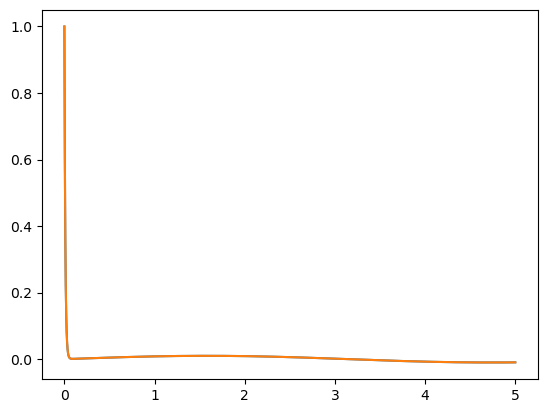

In [28]:
y,x = ETDRK4(T,h,u_0)

plt.plot(x,y)
plt.plot(x,U_true(x,1))
plt.show

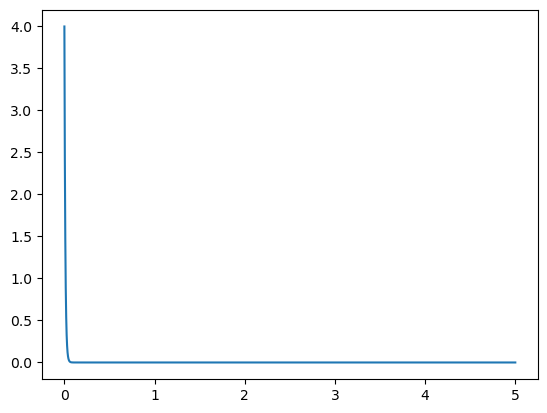

In [29]:
plt.plot(x,np.abs(y - U_true(x,5)))

In [ ]:
errorN = 14  


Test_H = np.zeros(errorN)

for i in range(0,errorN):
    Test_H[i] = 10**(-i/2)

In [31]:
Error_Vec1 = np.zeros(errorN)

for i in range(0, errorN):
    (y1,x) = ETDRK4(T, Test_H[i], u_0)
    print(x.size)
    yTrue = U_true(x,u_0)
    
    #if i == 6:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #elif i == 12:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    Error_Vec1[i] = Test_H[i]**0.5*np.linalg.norm(y1-yTrue)
#plt.legend()
#plt.xlabel("time")
#plt.ylabel("error from true soln")

6
16
51
159
501
1582
5001
15812
50001
158114
500000
1581139
5000001
15811389


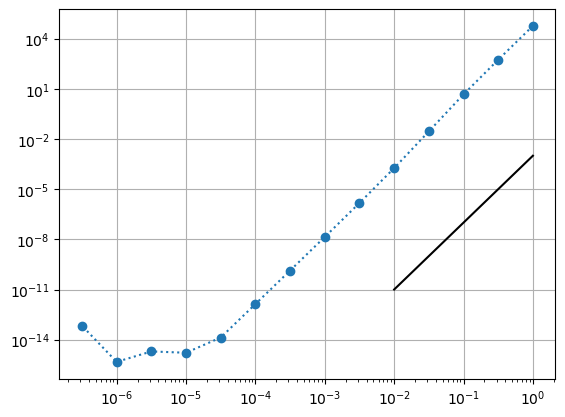

In [32]:
plt.loglog(Test_H, Error_Vec1, ':o')
plt.loglog([1e-2,1],[1e-11,1e-3],'k-')
plt.grid()

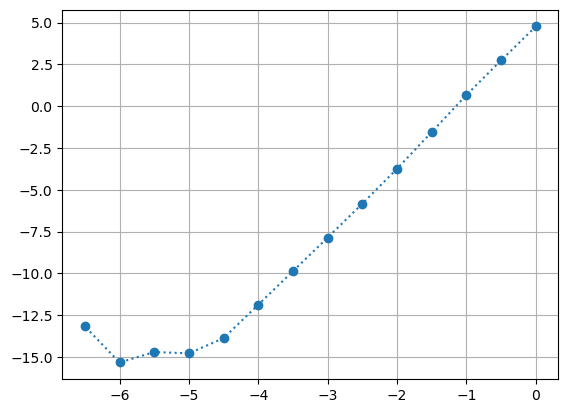

In [33]:
plt.plot(np.log10(Test_H), np.log10(Error_Vec1), 'o:')
plt.grid()